In [265]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [266]:
# Read data from file
    # Use Pandas to import the data from epa-sea-level.csv.
df = pd.read_csv('epa-sea-level.csv')
df.set_index('Year', inplace=True)
df

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...
2009,8.586614,8.311024,8.862205,8.046354
2010,8.901575,8.618110,9.185039,8.122973
2011,8.964567,8.661417,9.267717,8.053065


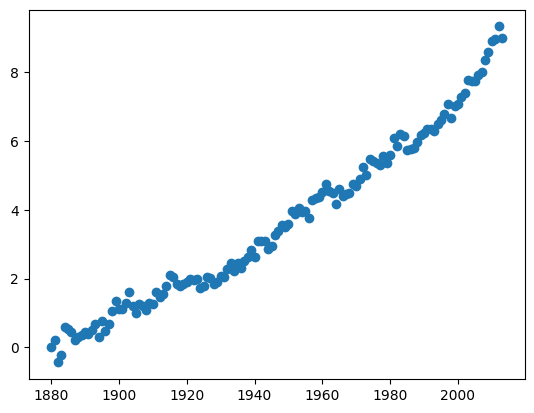

In [267]:
# Create scatter plot
    # Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
fig, ax = plt.subplots()
ax.scatter(df.index, df['CSIRO Adjusted Sea Level'])

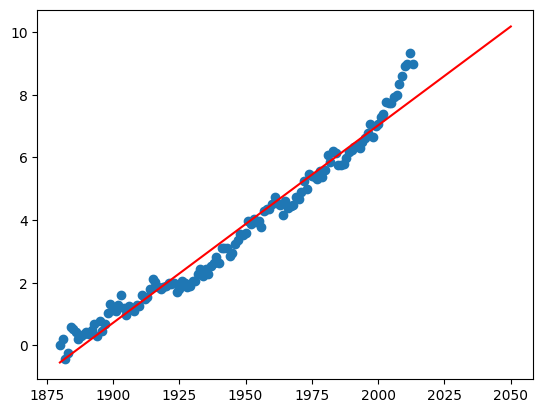

In [268]:
fig, ax = plt.subplots()
ax.scatter(df.index, df['CSIRO Adjusted Sea Level'])

# Create first line of best fit
    # Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.
    # Plot the line of best fit over the top of the scatter plot.
    # Make the line go through the year 2050 to predict the sea level rise in 2050.

def y(x, slope, y0):
    return (slope * x) + y0

final_year = 2050

line1 = linregress(df.index, df['CSIRO Adjusted Sea Level'])
line1_slope, line1_y0 = line1[0:2]

df1 = df.copy()

future_years = np.arange(df.iloc[-1].name+1, final_year+1)
for year in future_years:
    df1.loc[year] = pd.Series({})

df1['l1'] = y(df1.index, line1_slope, line1_y0)

ax.plot(df1.index, df1['l1'], color='red')

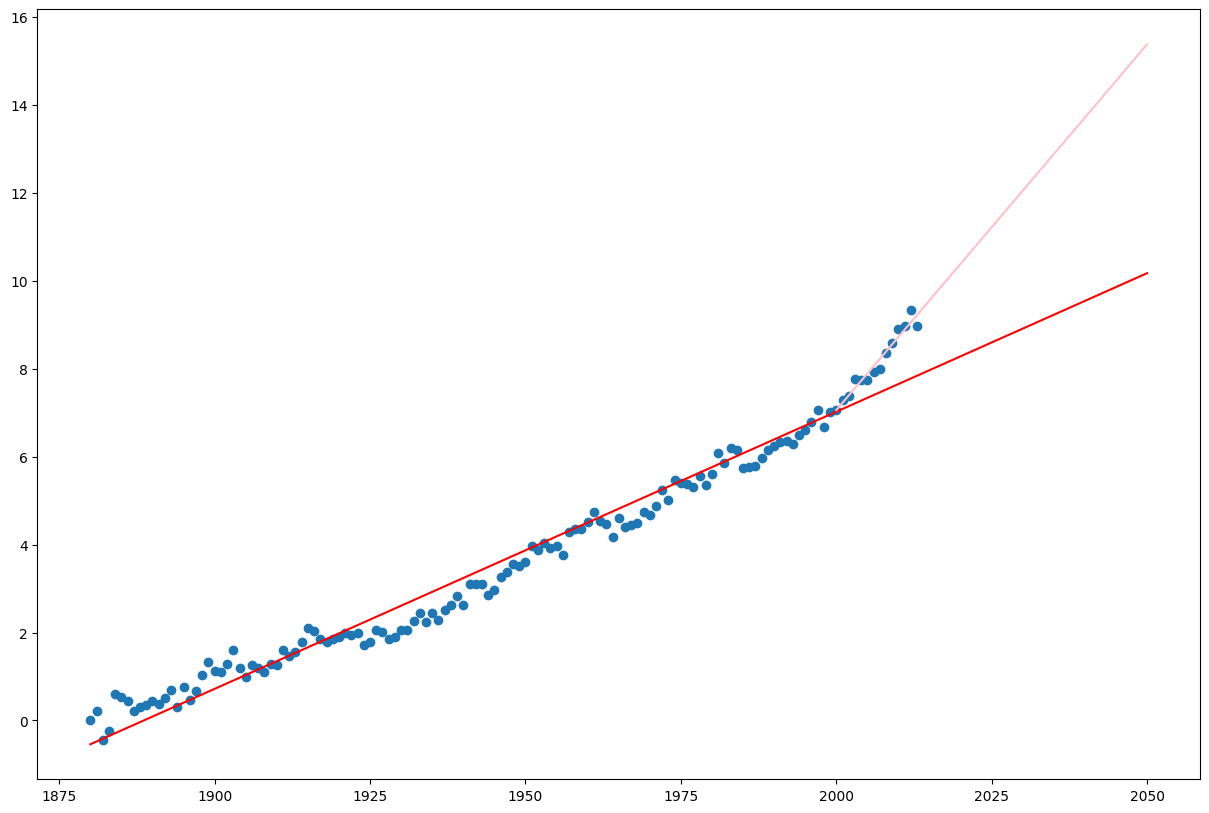

In [269]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df.index, df['CSIRO Adjusted Sea Level'])
ax.plot(df1.index, df1['l1'], color='red')

# Create second line of best fit
    # Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
    # Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

df_aux = df.loc[df.index >= 2000]
line2 = linregress(df_aux.index, df_aux['CSIRO Adjusted Sea Level'])
line2_slope, line2_y0 = line2[0:2]

df1['l2'] = y(df1.index, line2_slope, line2_y0)
df2 = df1.loc[df1.index >= 2000]

ax.plot(df2.index, df2['l2'], color='pink')

Text(0.5, 1.0, 'Rise in Sea Level')

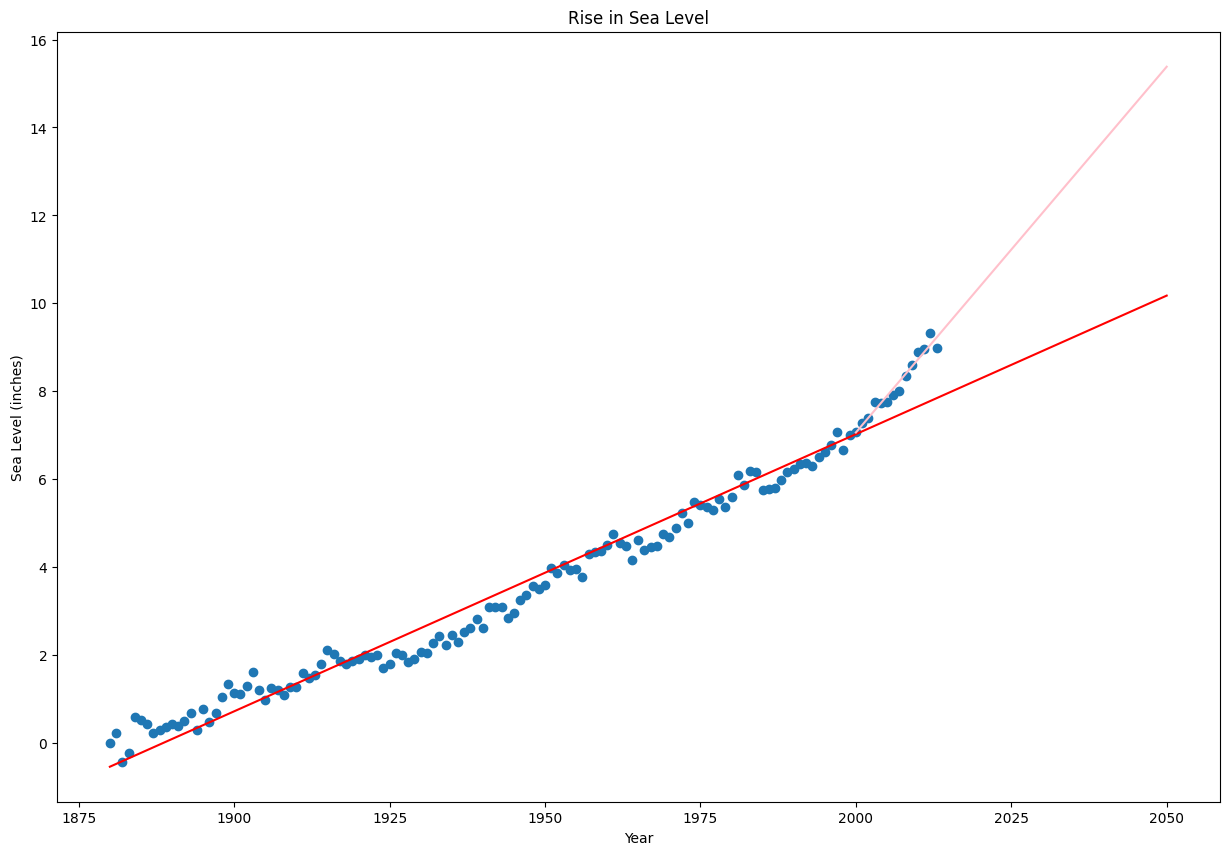

In [270]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df.index, df['CSIRO Adjusted Sea Level'])
ax.plot(df1.index, df1['l1'], color='red')
ax.plot(df2.index, df2['l2'], color='pink')

# Add labels and title
    # The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')